In [1]:
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from matplotlib.axes import Axes
from matplotlib.cm import coolwarm

import gpflow

2024-11-10 15:40:36.282460: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-10 15:40:36.374861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-10 15:40:36.374883: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-11-10 15:40:36.401883: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 15:40:36.854995: W tensorflow/stream_executor/platform/de

In [ ]:
import numpy as np
import gpflow
from gpflow.models import GPR
from gpflow.kernels import SquaredExponential
from gpflow.optimizers import Scipy
import tensorflow as tf

from emukit.model_wrappers import GPflowModelWrapper
from emukit.core import ParameterSpace, ContinuousParameter
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement
from emukit.bayesian_optimization.loops import BayesianOptimizationLoop

# Step 1: Load and prepare your data
N_samples = 100
input_dim = 10

# Replace with your actual data
X = np.random.uniform(-1, 1, size=(N_samples, input_dim))
Y = np.sum(np.sin(X), axis=1, keepdims=True) + np.random.normal(0, 0.1, size=(N_samples, 1))

# Step 2: Normalize the data using TensorFlow
X_mean, X_std = tf.reduce_mean(X, axis=0), tf.math.reduce_std(X, axis=0)
X_normalized = (X - X_mean) / X_std

Y_mean, Y_std = tf.reduce_mean(Y, axis=0), tf.math.reduce_std(Y, axis=0)
Y_normalized = (Y - Y_mean) / Y_std

# Step 3: Define the GPflow model
kernel = SquaredExponential()
gp_model = GPR(data=(X_normalized, Y_normalized), kernel=kernel, mean_function=None)

# Step 4: Optimize the GPflow model
optimizer = Scipy()

@tf.function
def objective_closure():
    return gp_model.training_loss()

optimizer.minimize(objective_closure, variables=gp_model.trainable_variables, options=dict(maxiter=100))

# Step 5: Wrap the model with Emukit
emukit_model = GPflowModelWrapper(gp_model)

# Step 6: Define the parameter space
parameter_space = ParameterSpace([
    ContinuousParameter(f'x{i+1}', -1, 1) for i in range(input_dim)
])

# Step 7: Set up the Bayesian Optimization loop
acquisition = ExpectedImprovement(model=emukit_model)
bo_loop = BayesianOptimizationLoop(
    model=emukit_model,
    space=parameter_space,
    acquisition=acquisition
)

# Step 8: Run the optimization loop
num_iterations = 10
bo_loop.run_loop(X_normalized, num_iterations)

# Step 9: Retrieve and denormalize results
X_opt_normalized = bo_loop.loop_state.X
Y_opt_normalized = bo_loop.loop_state.Y

X_opt = X_scaler.inverse_transform(X_opt_normalized)
Y_opt = Y_scaler.inverse_transform(Y_opt_normalized)

# Print optimized inputs and outputs
print("Optimized Inputs (X):")
print(X_opt)

print("\nOptimized Outputs (Y):")
print(Y_opt)


2024-11-11 14:22:01.460529: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-11 14:22:01.553352: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-11 14:22:01.553373: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-11-11 14:22:01.582053: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 14:22:02.003457: W tensorflow/stream_executor/platform/de

ImportError: cannot import name 'GPflowModelWrapper' from 'emukit.model_wrappers' (/home/qezlou/miniconda3/envs/het-cosmo/lib/python3.8/site-packages/emukit/model_wrappers/__init__.py)

Mean Squared Error on training data: [1.00428376e-03 1.29992406e-03 3.82553516e-03 2.63270169e-03
 7.34199023e-04 1.85871635e-04 3.75403779e-03 1.42098069e-06
 2.59731690e-05 6.85868238e-02 1.76019620e-04 1.17277821e-02
 4.36997758e-03 3.28698871e-02 7.00113418e-05 2.42991517e-03
 1.23990141e-02 3.07897806e-02 1.94434446e-03 8.51384720e-03
 8.27282665e-05 3.19044012e-03 1.21755915e-04 2.71271406e-02
 6.47731410e-03 1.74278903e-03 6.48316515e-03 3.06627989e-02
 4.14304132e-03 5.04470066e-06 1.63983024e-02 6.72935063e-03
 7.81468305e-05 3.03234990e-03 9.40521010e-04 1.68412182e-02
 4.13435189e-02 5.15167377e-05 6.98979702e-03 8.64346891e-03
 6.81993618e-03 4.37969069e-03 7.38030311e-04 3.14301190e-04
 2.99082315e-03 1.98670290e-02 3.43741802e-06 7.47901672e-03
 2.08276997e-02 3.80987678e-05 3.25902239e-03 1.10974581e-06
 1.14755563e-04 1.91546354e-03 2.20352561e-02 1.59182087e-05
 2.19571745e-03 5.32182065e-03 6.27361940e-03 8.63518569e-04
 1.07061471e-02 1.82345945e-02 4.66642762e-03 1.

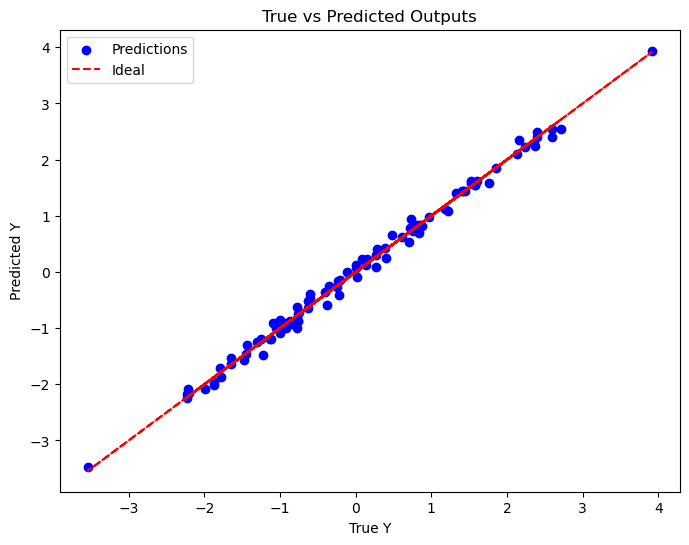

In [4]:
import numpy as np
import gpflow
from gpflow.models import GPR
from gpflow.kernels import SquaredExponential
from gpflow.optimizers import Scipy
import tensorflow as tf
from tensorflow.keras.losses import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load and prepare your data
N_samples = 100
input_dim = 10

# Replace with your actual data
X = np.random.uniform(-1, 1, size=(N_samples, input_dim))
Y = np.sum(np.sin(X), axis=1, keepdims=True) + np.random.normal(0, 0.1, size=(N_samples, 1))

# Step 2: Normalize the data using TensorFlow
X_min, X_max = tf.reduce_min(X, axis=0), tf.reduce_max(X, axis=0)
X_normalized = (X - X_min) / (X_max - X_min)

Y_mean, Y_std = tf.reduce_mean(Y, axis=0), tf.math.reduce_std(Y, axis=0)
Y_normalized = (Y - Y_mean) / Y_std

# Step 3: Define the GPflow model
kernel = SquaredExponential(lengthscales=np.ones(input_dim))
gp_model = GPR(data=(X_normalized, Y_normalized), kernel=kernel, mean_function=None)

# Step 4: Optimize the GPflow model
optimizer = Scipy()

@tf.function
def objective_closure():
    return gp_model.training_loss()

optimizer.minimize(objective_closure, variables=gp_model.trainable_variables, options=dict(maxiter=100))

# Step 5: Make predictions
mean, variance = gp_model.predict_f(X_normalized)

# Denormalize predictions
Y_pred = mean * Y_std + Y_mean


# Step 6: Evaluate the model
mse = mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error on training data: {mse}")

# Step 7: Visualize the results
plt.figure(figsize=(8,6))
plt.scatter(Y, Y_pred, c='blue', label='Predictions')
plt.plot(Y, Y, 'r--', label='Ideal')
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.title('True vs Predicted Outputs')
plt.legend()
plt.show()


11/11/2024 05:05:45 PM Total snapshots: 200
11/11/2024 05:05:45 PM Total snapshots: 200
11/11/2024 05:05:45 PM Orignal corr shape (100, 65, 5)
11/11/2024 05:05:45 PM Orignal corr shape (100, 65, 5)
11/11/2024 05:05:45 PM Found 12.0 % of W(r_p, Pi) as nan
11/11/2024 05:05:45 PM Found 12.0 % of W(r_p, Pi) as nan
11/11/2024 05:05:45 PM Orignal corr shape (100, 65, 5)
11/11/2024 05:05:45 PM Orignal corr shape (100, 65, 5)


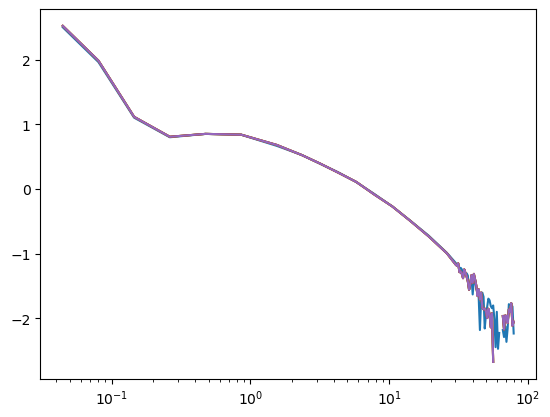

In [2]:
import importlib
import summary_stats
import single_fid
import h5py
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(summary_stats)
importlib.reload(single_fid)
proj = summary_stats.ProjCorr(data_dir='/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/', fid='L2')
proj.find_nan_log10_bins()
_, wp, _ = proj.get_wp(r_range=(0,10))

In [37]:
print(Y.shape, np.where(Y[:199]==0))

(200, 65) (array([], dtype=int64), array([], dtype=int64))


In [42]:
with h5py.File(proj.data_files[199], 'r') as f:
    print(f.keys())
    print(f['corr'][:])

<KeysViewHDF5 ['corr', 'r', 'seeds']>
[[[ 1.40721189e+03  1.15574548e+03  7.03105943e+02  3.51052972e+02
    2.00173127e+02]
  [ 4.14234796e+02  1.83548798e+02  2.29685998e+02  1.37411599e+02
    4.51371996e+01]
  [ 6.01354804e+01  2.25136463e+01  2.72163756e+01  8.40545852e+00
    3.70272926e+00]
  ...
  [ 1.60414043e-02 -2.38516416e-02 -3.37017764e-02 -5.62889227e-03
   -4.79844719e-02]
  [ 5.94483594e-02 -3.95766118e-03 -1.72066804e-02  5.03274473e-03
    3.14002770e-03]
  [ 4.24212958e-02 -5.76739033e-03 -8.04044156e-03 -2.12241387e-02
   -9.40427230e-03]]

 [[ 2.37543607e+03  1.30846477e+03  1.11446999e+03  6.77981733e+02
    2.89992171e+02]
  [ 4.58739426e+02  3.99418210e+02  2.36284865e+02  2.06624257e+02
    1.17642433e+02]
  [ 5.79540180e+01  3.52793957e+01  4.43492446e+01  3.07444712e+01
    3.07444712e+01]
  ...
  [ 4.01030579e-02  3.91531921e-02 -2.82872801e-02 -3.25616763e-02
   -2.87622130e-02]
  [ 3.03142752e-02 -1.02959863e-02  5.67434123e-03 -1.98781829e-02
   -3.90785